In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
boston = load_boston()

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
col = boston['feature_names']

In [6]:
boston_df=pd.DataFrame(boston['data'], columns= col)

In [7]:
boston_target=pd.DataFrame(boston['target'],columns=['PRICE'])

In [8]:
boston_df=pd.concat([boston_df,boston_target],axis=1)

In [9]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Exploratory Data Analysis

In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Observations : 506 non-null rows with 14 columns

In [11]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
corr = boston_df.corr()

<AxesSubplot:>

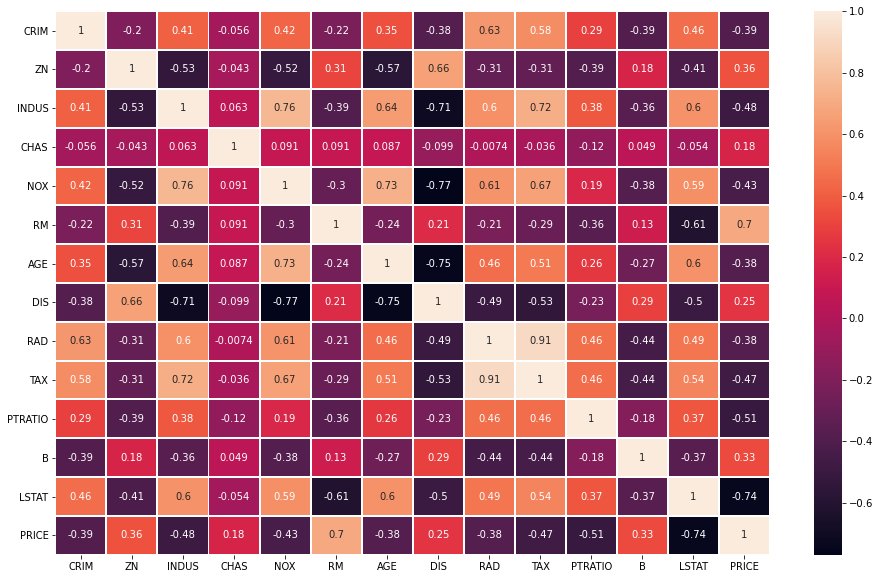

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot = True, linewidths = 1)

In [33]:
X = boston_df.iloc[:,:13]

X.drop(['CHAS'], axis = 1, inplace = True)

y=boston_df['PRICE']

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
vif_df = pd.DataFrame()

vif_df['Features'] = X.columns

vif_df['Co-eff'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [16]:
vif_df

,Features,Co-eff
0,CRIM,2.095452
1,ZN,2.843338
2,INDUS,14.335996
3,NOX,73.648313
4,RM,77.548467
5,AGE,21.336184
6,DIS,14.699026
7,RAD,15.003003
8,TAX,60.360513
9,PTRATIO,84.234153


In [34]:
X

,CRIM,ZN,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,6.593,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,6.976,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,6.794,2.3889,1.0,273.0,21.0,393.45,6.48


### Scaling

In [35]:
sc = StandardScaler()

X_Scale = sc.fit_transform(X)

### Train Test Split

In [36]:
#Data Split
X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size = 0.4, random_state=101)

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
co_eff = lm.coef_

In [40]:
pd.DataFrame(co_eff, index = X.columns, columns =['Coefficient'])

,Coefficient
CRIM,-0.682138
ZN,0.887502
RM,2.307439
DIS,-2.070518
RAD,1.930793
TAX,-2.156701
PTRATIO,-1.542877
B,0.819100
LSTAT,-4.636515


In [23]:
pd.DataFrame(co_eff, index = X.columns, columns =['Coefficient'])

,Coefficient
CRIM,-0.720790
ZN,0.904651
INDUS,0.790792
NOX,-2.285075
RM,2.153586
AGE,0.609382
DIS,-2.600715
RAD,2.487132
TAX,-2.144493
PTRATIO,-2.066698


In [41]:
test_pre = lm.predict(X_test)

In [42]:
train_pred = lm.predict(X_train)

### Plotting

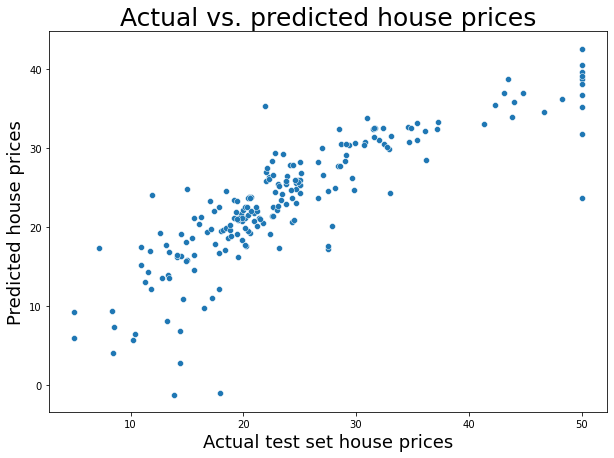

In [43]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
sns.scatterplot(x = y_test, y = test_pre);

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


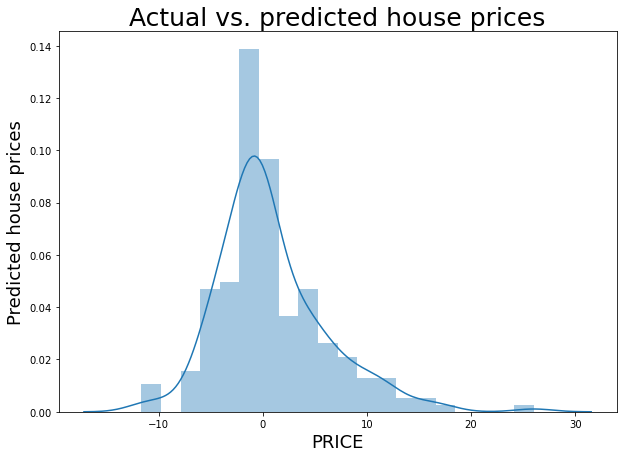

In [28]:
#Residuals following Normal Distribution
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
sns.distplot((y_test-test_pre));

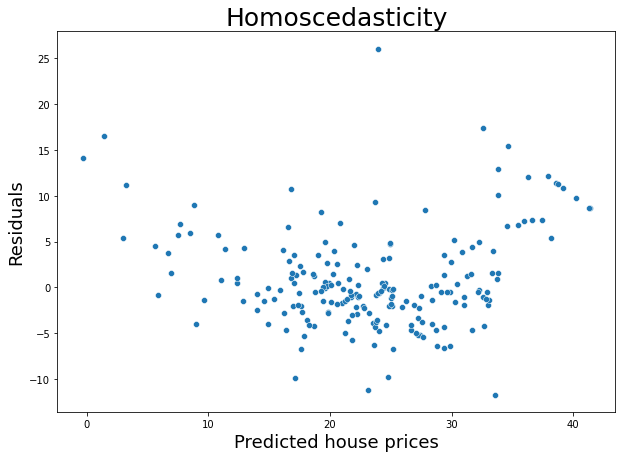

In [203]:
plt.figure(figsize=(10,7))
plt.title("Homoscedasticity",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
sns.scatterplot(x = test_pre, y = y_test - test_pre);

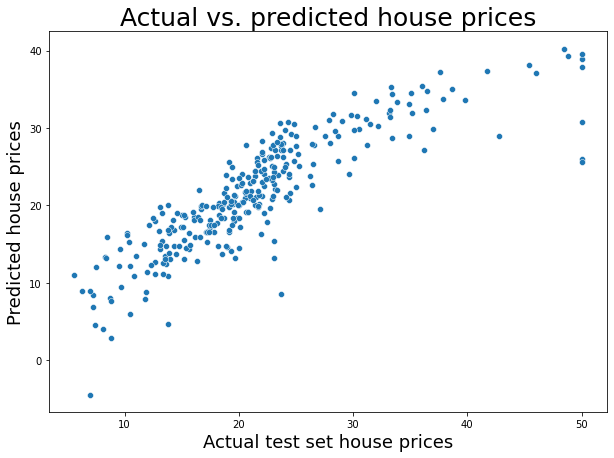

In [204]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
sns.scatterplot(x = y_train, y = train_pred);

### Error Metrics

In [183]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pre))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pre))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pre)))

print('Test R2: ', metrics.r2_score(y_test, test_pre))

Train MAE:  3.019112517792949
Train MSE:  19.094935581934088
Train RSME:  4.369775232427188
Train R2:  0.7374801239269284
-------------------------------
Test MAE:  3.775684615481378
Test MSE:  28.75023578567271
Test RSME:  5.361924634464075
Test R2:  0.7064093068358335


In [44]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pre))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pre))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pre)))

print('Test R2: ', metrics.r2_score(y_test, test_pre))

Train MAE:  3.0728056903557963
Train MSE:  20.257632387759916
Train RSME:  4.500847963190927
Train R2:  0.7214952037334958
-------------------------------
Test MAE:  3.7058897778940016
Test MSE:  29.089540558196898
Test RSME:  5.393472031835977
Test R2:  0.7029444057441725


In [47]:
reg = sm.OLS(y,X).fit()

In [48]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1269.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        15:34:25   Log-Likelihood:                         -1529.2
No. Observations:                 506   AIC:                                      3076.
Df Residuals:                     497   BIC:                                      3115.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0972      0.035     -2.814      0.005      -0.165      -0.029
ZN             0.0508      0.014      3.566      0.000       0.023       0.079
RM             5.8298      0.244     23.931      0.000       5.351       6.308
DIS           -0.9151      0.168     -5.457      0.000      -1.245      -0.586
RAD            0.1954      0.064      3.057      0.002       0.070       0.321
TAX           -0.0114      0.003     -3.418      0.001      -0.018      -0.005
PTRATIO       -0.4267      0.109     -3.904      0.000      -0.641      -0.212
B              0.0151      0.003      5.630      0.000       0.010       0.020
LSTAT         -0.4469      0.043    -10.435      0.000      -0.531      -0.363
==============================================================================
Omnibus:                      211.417   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.067
Skew:                           1.694   Prob(JB):                    1.15e-298
Kurtosis:                      10.321   Cond. No.                         634.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
INDUS NOX AGE